In [37]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

In [38]:
edges = pd.read_csv('data/edges.csv')
edges.head()

source  target   tau  severity    weight    color  gender  patients_norm  \
0       0       1  0.01  Moderate  1.128571  #fcb89d  Female       1.005515   
1       0      18  0.03  Moderate  1.385714  #808080    Male       1.022060   
2       0      26  0.07  Moderate  1.900000  #fcb297  Female       1.049636   
3       0      28  0.26  Moderate  4.342857  #e4bbaa  Female       1.044121   
4       0      72  0.16     Major  3.057143  #bc141a  Female       1.008273   

        RRI^F  patients  tau_norm     RRI^M  
0    1.416707         3  1.128571  0.705862  
1    0.885442         9  1.385714  1.129379  
2    1.534766        19  1.900000  0.651565  
3    1.011934        17  4.342857  0.988207  
4  126.090000         4  3.057143  0.000000

In [39]:
nodes = pd.read_csv("data/nodes.csv")
nodes.head()

index     name  p_node  hormone  len_i    color           label  \
0      0  DB01174    0.05    False  13638  #976fb0   Phenobarbital   
1      1  DB00741    0.01    False    354  #f2ea25  Hydrocortisone   
2      2  DB00252    0.20    False  42794  #976fb0       Phenytoin   
3      3  DB00682    0.13    False  57959  #f498b7        Warfarin   
4      4  DB00537    0.01    False   1235  #66c059   Ciprofloxacin   

                   class                               _pos  
0             CNS agents  array([-4.66799967, 12.61264127])  
1               Hormones  array([-4.7376672 , 12.36944394])  
2             CNS agents  array([-4.5855901 , 12.78314764])  
3  Coagulation modifiers  array([-4.35867091, 13.22796649])  
4        Anti-infectives  array([-4.48904823, 13.07862892])

In [63]:
G = nx.Graph()

for i, node in nodes.iterrows():
    G.add_node(i, 
               name = node['label'], 
               color = node['color'])

for i, edge in edges.iterrows():
    G.add_edge(int(edge['source']), 
               int(edge['target']), 
               weight = int(edge['weight']), 
               color = edge['color'])

In [78]:
node_names = nx.get_node_attributes(G, 'name')
node_colors = nx.get_node_attributes(G, 'color')

edge_weights = nx.get_edge_attributes(G, 'weight')
edge_colors = nx.get_edge_attributes(G, 'color')

pos = nx.spring_layout(G, k = 200, iterations = 8000)

Text(0.5, 1.0, 'Blumenau drug interactions')

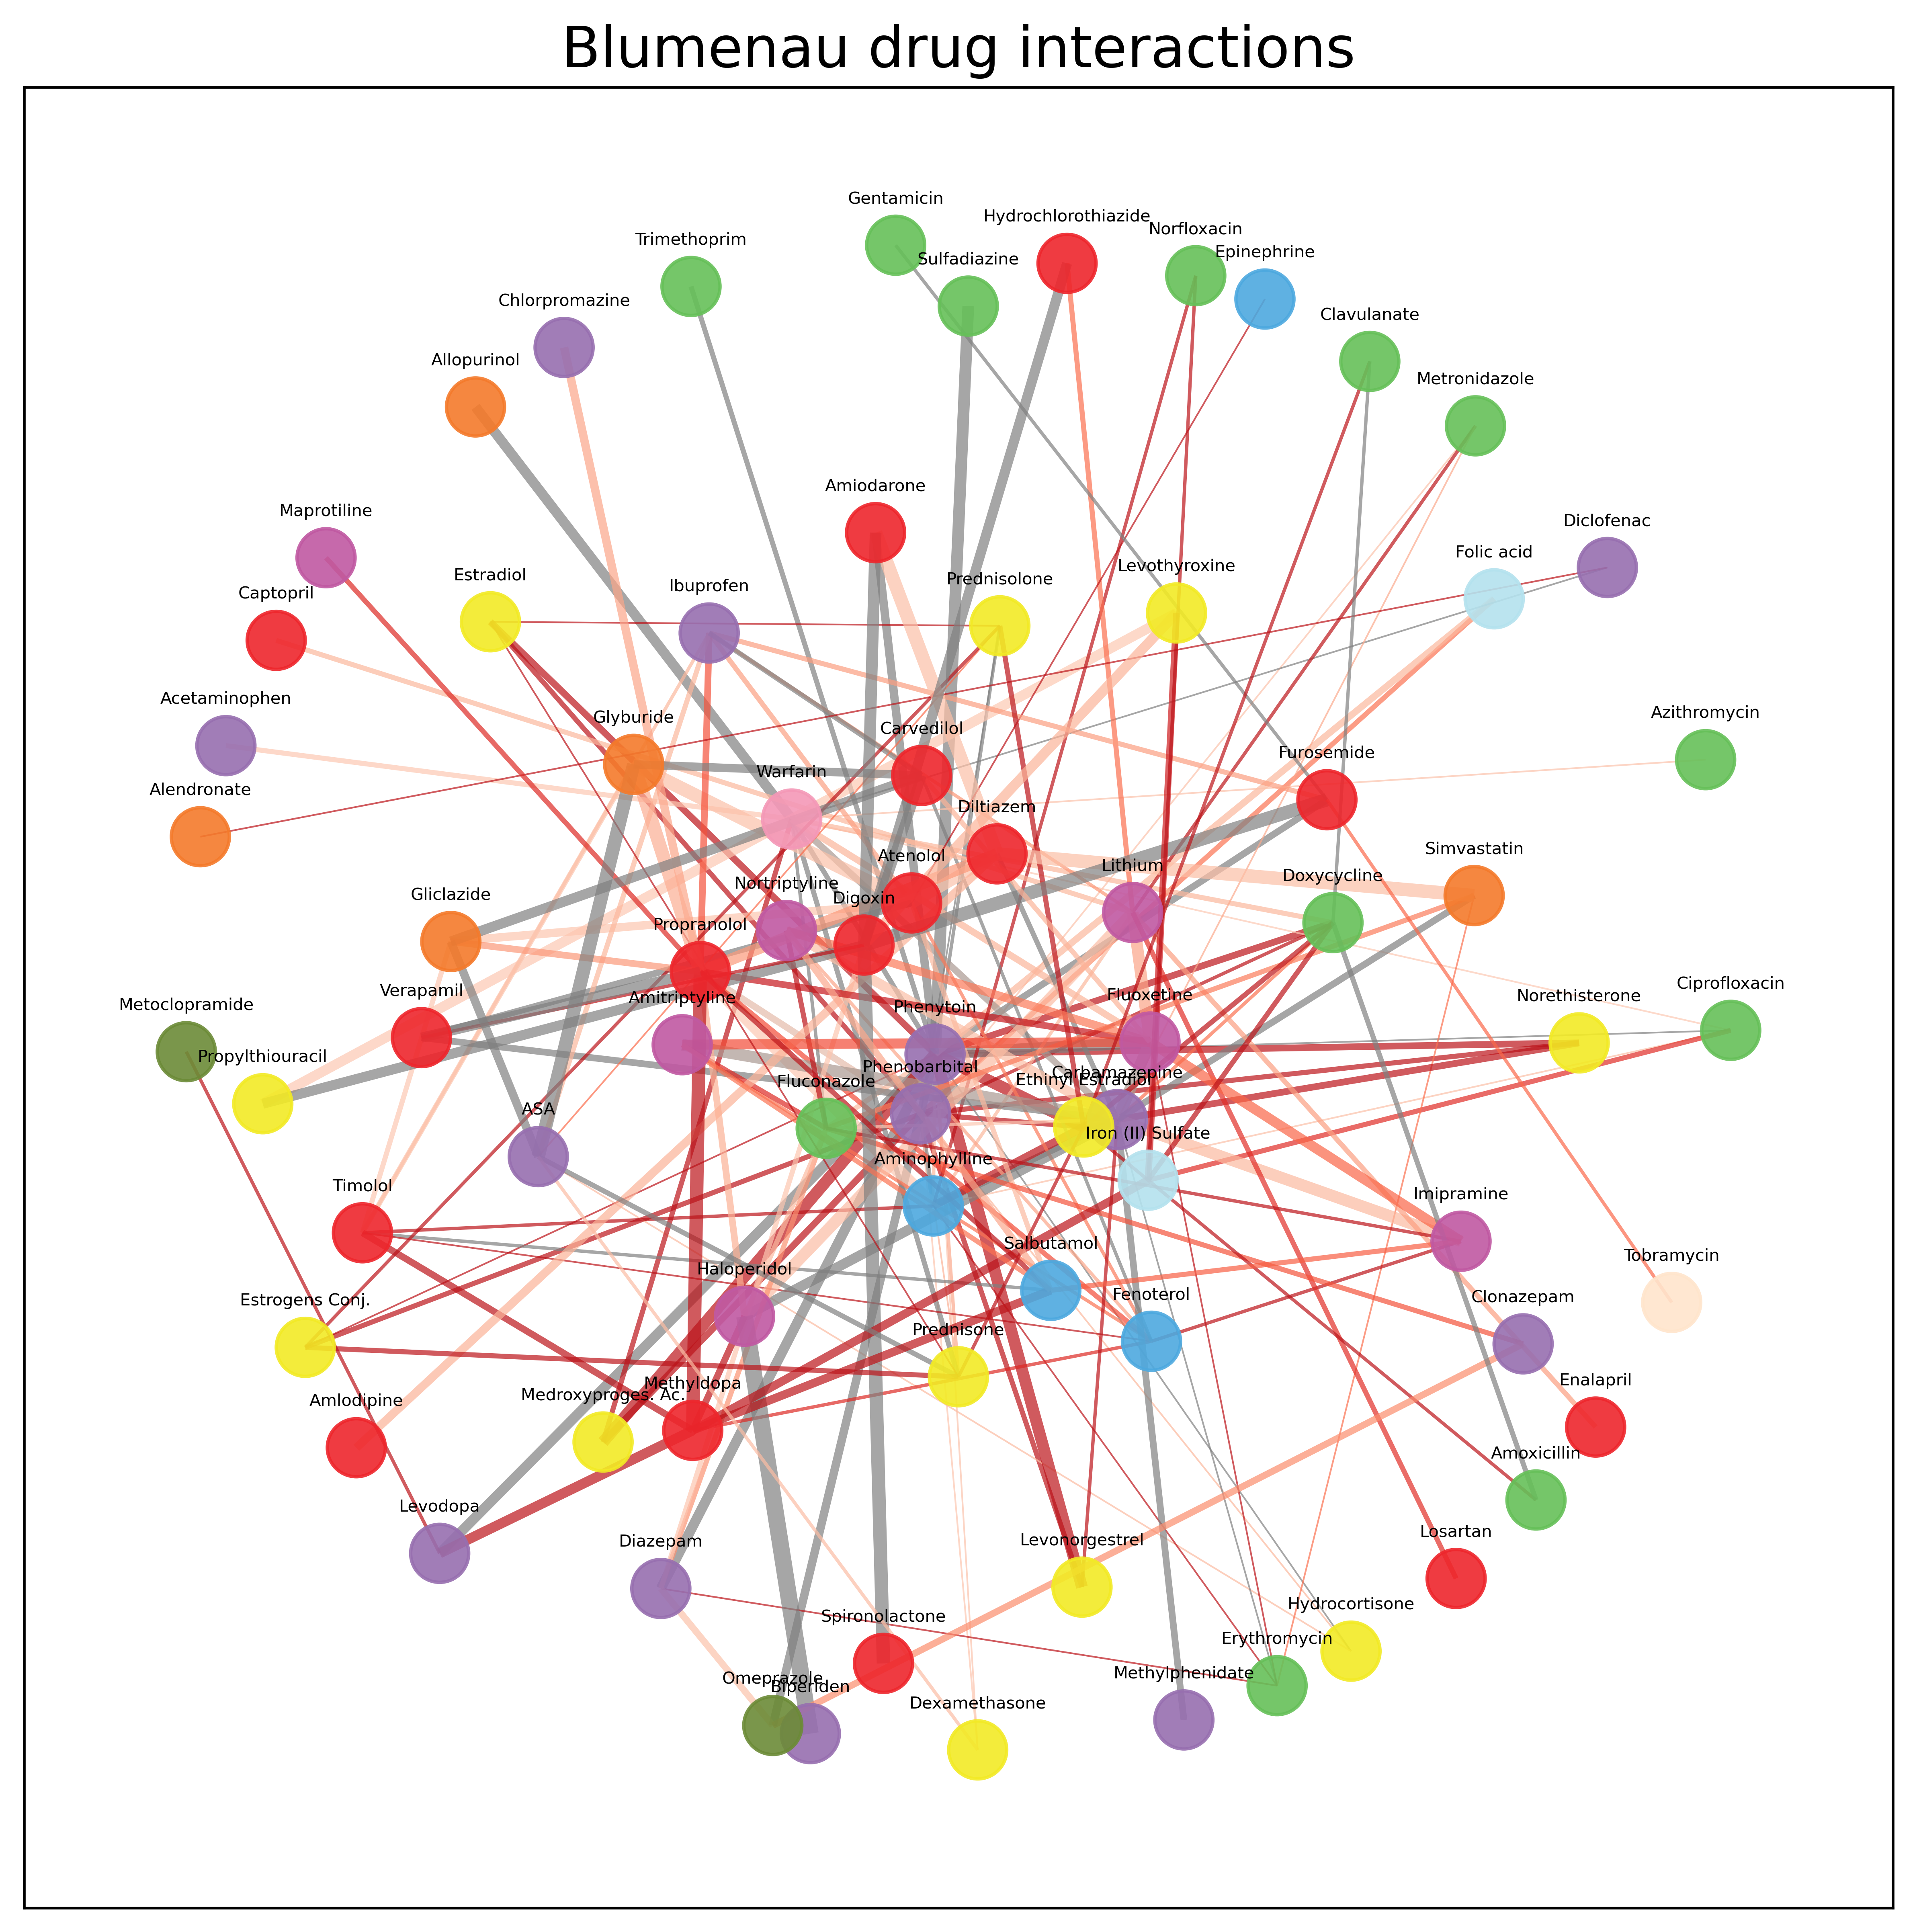

In [86]:
fig, ax = plt.subplots(1, 
                       1, 
                       figsize = (10, 10), 
                       dpi = 600)

nx.draw_networkx_nodes(G, 
                       pos = pos,
                       alpha = 0.9, 
                       ax = ax,
                       node_color= node_colors.values())

nx.draw_networkx_edges(G, 
                       pos=pos, 
                       width=np.array([w for w in edge_weights.values()]) / 2, 
                       edge_color = edge_colors.values(), 
                       alpha = 0.7, 
                       ax = ax)

for i, (node, (x, y)) in enumerate(pos.items()):
    ax.text(x, 
            y + 0.06, 
            node_names[i], 
            fontsize = 5, 
            ha = "center", 
            va = "center")


ax.set_title("Blumenau drug interactions", 
             fontsize = 17)